In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [41]:
from plotting import *

In [4]:
dataDir = "."

In [5]:
listOfRuns = ['ShortRun-seed-48203-0.0-0.0-False','ShortRun-seed-48203-0.0-0.8-True']
# If list is empty, all runs of the following experiment will be loaded
experimentName='LongRun'

In [6]:
M = 16

### If list of runs is empty, load all runs from [experimentName]

In [7]:
if len(listOfRuns)==0:
    for folder in listdir(dataDir):
        if experimentName=='LongRun' and 'v2' in folder:
            continue
        if folder.split('-')[0]==experimentName:
            listOfRuns.append(folder)

### Load listed runs

In [34]:
loss_results, acc_results = load_list_of_runs(listOfRuns)

Loading run logs:
----------------
ShortRun-seed-48203-0.0-0.0-False
ShortRun-seed-48203-0.0-0.8-True


## Enter batch time averages here

In [9]:
SYNC_SECONDS_PER_BATCH = 24

ASYNC_SECONDS_PER_BATCH = 20

In [10]:
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v', '0.0':'D'}

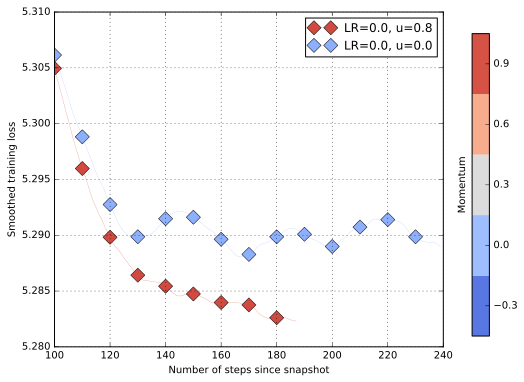

In [44]:
f = plot_all_runs(loss_results, window=100, two_panels=False, marker_dict=marker_dict)

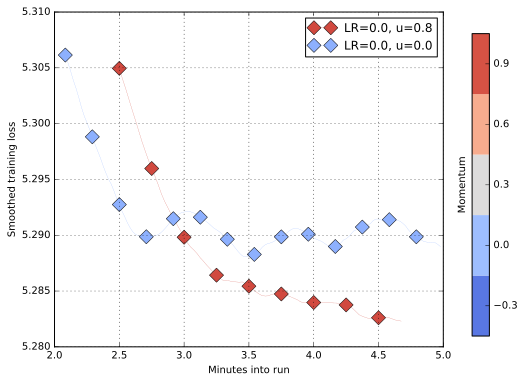

In [45]:
f = plot_all_runs(loss_results, window=100, marker_dict=marker_dict, two_panels=False,
             sync_seconds_per_batch=SYNC_SECONDS_PER_BATCH, async_seconds_per_batch=ASYNC_SECONDS_PER_BATCH,
             CG=M)

### Relative gap of loss means

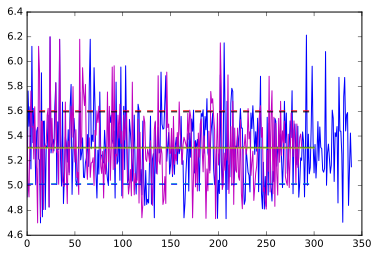

In [13]:
for key in loss_results.keys():
    plt.plot(loss_results[key])
    plt.plot([0,300,], 2*[np.mean(loss_results[key])])
    plt.plot([0,300,], 2*[np.mean(loss_results[key])+np.std(loss_results[key])],'--')
    plt.plot([0,300,], 2*[np.mean(loss_results[key])-np.std(loss_results[key])],'--')

In [115]:
for key in loss_results.keys():
    print key, np.mean(loss_results[key])

ShortRun-seed-48203-0.0-0.0-False 5.30932168529
ShortRun-seed-48203-0.0-0.8-True 5.30330947569


In [116]:
for key in loss_results.keys():
    print np.std(loss_results[key])

0.294185593931
0.291874394868


In [117]:
(5.30932168529-5.30330947569)/5.30330947569

0.0011336712721667962

### Relative gap of loss means, same number of steps

In [15]:
minlen=None
for key in loss_results.keys():
    if minlen is None or minlen>len(loss_results[key]):
        minlen=len(loss_results[key])
for key in loss_results.keys():
    print key, np.mean(loss_results[key][:minlen])

ShortRun-seed-48203-0.0-0.0-False 5.30424028819
ShortRun-seed-48203-0.0-0.8-True 5.30330947569


In [17]:
(5.30424028819-5.30330947569)/5.30330947569

0.00017551540302651088

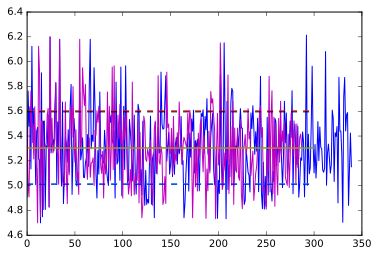

In [18]:
for key in loss_results.keys():
    plt.plot(loss_results[key])
    plt.plot([0,300,], 2*[np.mean(loss_results[key][:minlen])])
    plt.plot([0,300,], 2*[np.mean(loss_results[key])+np.std(loss_results[key])],'--')
    plt.plot([0,300,], 2*[np.mean(loss_results[key])-np.std(loss_results[key])],'--')

### Toggle to hide all code

In [1]:
from IPython.display import HTML

if False:
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')